In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# All comments in here will be in English, because I feel sick while remembering all translations for Deep Learning in Russian

In [2]:
!pip install -U 'git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI'
!pip install git+https://github.com/alexhock/object-detection-metrics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/cocodataset/cocoapi.git to /tmp/pip-req-build-pv0yu1av
  Running command git clone -q https://github.com/cocodataset/cocoapi.git /tmp/pip-req-build-pv0yu1av
  Created wheel for pycocotools: filename=pycocotools-2.0-cp37-cp37m-linux_x86_64.whl size=265173 sha256=0aca61b732a1bdd897e91a07109465622f5196eb1b898b91f67b8f3b82e0dd36
  Stored in directory: /tmp/pip-ephem-wheel-cache-oww__yl1/wheels/e2/6b/1d/344ac773c7495ea0b85eb228bc66daec7400a143a92d36b7b1
Successfully built pycocotools
  Attempting uninstall: pycocotools
    Found existing installation: pycocotools 2.0.4
    Uninstalling pycocotools-2.0.4:
      Successfully uninstalled pycocotools-2.0.4
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/alexhock/object-detection-metrics to /tmp/pip-req-build-4432u04h
  Running command git c

In [3]:
!pip install albumentations==1.1
!pip install ensemble-boxes
!pip install git+https://github.com/rwightman/pytorch-image-models.git
!pip install git+https://github.com/rwightman/efficientdet-pytorch.git
!pip install torch==1.8.2 torchvision==0.9.2 torchaudio==0.8.2 --extra-index-url https://download.pytorch.org/whl/lts/1.8/cu111 # torch version < 1.14
# !pip install effdet==0.2.4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 102 kB 3.3 MB/s 
     |████████████████████████████████| 48.3 MB 1.3 MB/s 
  Attempting uninstall: albumentations
    Found existing installation: albumentations 0.1.12
    Uninstalling albumentations-0.1.12:
      Successfully uninstalled albumentations-0.1.12
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/rwightman/pytorch-image-models.git to /tmp/pip-req-build-_uiz6tli
  Running command git clone -q https://github.com/rwightman/pytorch-image-models.git /tmp/pip-req-build-_uiz6tli
  Created wheel for timm: filename=timm-0.6.6-py3-none-any.whl size=514373 sha256=b8afde176bef329fd6fe281b18b078a6fa42feaf0d6bcc719e771250d0b8359e
  Stored in directory: /tmp/pip-ephem-wheel-ca

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/, https://download.pytorch.org/whl/lts/1.8/cu111
     |█████████████▌                  | 834.1 MB 1.4 MB/s eta 0:13:21tcmalloc: large alloc 1147494400 bytes == 0x3939a000 @  0x7fa258401615 0x592b76 0x4df71e 0x59afff 0x515655 0x549576 0x593fce 0x548ae9 0x51566f 0x549576 0x593fce 0x548ae9 0x5127f1 0x598e3b 0x511f68 0x598e3b 0x511f68 0x598e3b 0x511f68 0x4bc98a 0x532e76 0x594b72 0x515600 0x549576 0x593fce 0x548ae9 0x5127f1 0x549576 0x593fce 0x5118f8 0x593dd7
     |█████████████████               | 1055.7 MB 1.2 MB/s eta 0:12:49tcmalloc: large alloc 1434370048 bytes == 0x7d9f0000 @  0x7fa258401615 0x592b76 0x4df71e 0x59afff 0x515655 0x549576 0x593fce 0x548ae9 0x51566f 0x549576 0x593fce 0x548ae9 0x5127f1 0x598e3b 0x511f68 0x598e3b 0x511f68 0x598e3b 0x511f68 0x4bc98a 0x532e76 0x594b72 0x515600 0x549576 0x593fce 0x548ae9 0x5127f1 0x549576 0x593fce 0x5118f8 0x593dd7
     |█████████████████████▋    

In [137]:
import math
import pandas as pd
import pathlib
from pathlib import Path
import tqdm
import numpy as np
import pandas as pd
import cv2
import albumentations as A
from albumentations.pytorch import ToTensorV2

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim 
from torch.utils.data import DataLoader, Dataset
import torchvision
from torchvision import transforms
from torchvision import models
import timm


# from PIL import Image, ImageDraw
from matplotlib.pyplot import imshow

import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from pycocotools.coco import COCO
import skimage.io as io
import pylab
from tqdm import tqdm

from ensemble_boxes import *

from effdet.config.model_config import efficientdet_model_param_dict
from effdet import get_efficientdet_config, EfficientDet, DetBenchTrain
from effdet.efficientdet import HeadNet
from effdet.config.model_config import efficientdet_model_param_dict

plt.rcParams['figure.figsize'] = [15, 15]

device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

# Check random image from dataset

In [138]:
dataDir= Path('/content/gdrive/MyDrive/test_task_layout/dataset/data')
annFile=Path('/content/gdrive/MyDrive/test_task_layout/dataset/train.json')

In [139]:
coco=COCO(annFile)
cats = coco.loadCats(coco.getCatIds())
nms=[cat['name'] for cat in cats]
print('COCO categories: \n{}\n'.format(' '.join(nms)))

loading annotations into memory...
Done (t=0.20s)
creating index...
index created!
COCO categories: 
text figure



In [140]:
def scale_bboxes(anns, img):
    image_height = img['height']
    image_width = img['width']
    for ann in anns: 
        x_left, y_left, width, height = ann['bbox']
        x_left_scaled, y_left_scaled, width_scaled, height_scaled = x_left*image_width, y_left*image_height, width*image_width, height*image_height
        one_new_ann = [x_left_scaled, y_left_scaled, width_scaled, height_scaled]
        ann['bbox'] = one_new_ann
    return anns

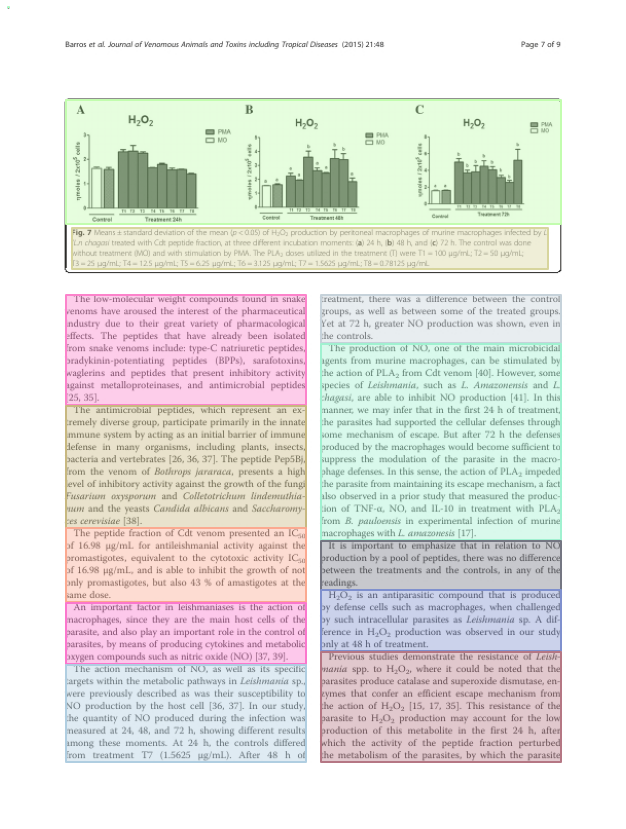

In [141]:
catIds = coco.getCatIds(catNms=['text','figure']);
imgIds = coco.getImgIds(catIds=catIds );
random_img_id = np.random.choice(imgIds)
imgIds = coco.getImgIds(imgIds = [random_img_id])
img = coco.loadImgs(imgIds)[0]

I = io.imread(dataDir/img['file_name'])

annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco.loadAnns(annIds)

plt.imshow(I/255);
plt.axis('off')
coco.showAnns(scale_bboxes(anns,img), draw_bbox=True)

# Model

In [142]:
data = pathlib.Path('/content/gdrive/MyDrive/test_task_layout/dataset/data') # check if folder has 1190 images
assert len([*data.iterdir()])==1190

In [143]:
# Define config for it to be more handy to manipulate hyperparameters
config = {
    'root_path' : pathlib.Path('/content/gdrive/MyDrive/test_task_layout/dataset'), # указать папку, в которой содержится папака с разметкой и файлами
    'batch_size'          : 2,
    'num_epochs'          : 15,
    'iou_thr'             : 0.25,
    'skip_box_thr'        : 0.4, 
    'image_size'          : 384, # must be divisible by 128 because of effdet
    'learning_rate'       : 1e-5,
     'weight_decay'       : 5e-4,
     'num_workers'        : 2,
     'pin_memory'         : True,     
    }

In [144]:
class DocsDataset(torch.utils.data.Dataset):
    def __init__(self, root, split, transforms=None):
        self.root = pathlib.Path(root)
        self.dataset_coco = COCO(f"{self.root}/{split}.json")
        self.images = self.root/'data'
        self.transforms = transforms
        
    def __getitem__(self, idx):
        img_coco_dict = self.dataset_coco.dataset['images'][idx]
        catIds = self.dataset_coco.getCatIds(catNms=['text','figure']);
        img = cv2.imread(str(self.images/img_coco_dict['file_name'])) 

        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB).astype(np.float32)
        img /= 255.0        

        bboxes = []
        labels = []
        segmentations = []

        img_data = self.dataset_coco.getAnnIds(imgIds=img_coco_dict['id'], catIds=catIds, iscrowd=None)
        img_data = self.dataset_coco.loadAnns(img_data)

        for ind in range(len(img_data)):
            box = img_data[ind]['bbox'] 
            label = img_data[ind]['category_id']            
            segmentation = img_data[ind]['segmentation']
            labels.append(label)
            bboxes.append(self.box_to_pascal(img, box, label))
            segmentations.append(segmentation)

        boxes = torch.as_tensor(bboxes, dtype=torch.float64)
        labels = torch.as_tensor(labels, dtype=torch.float64)
        segmentations = torch.as_tensor(segmentations[0], dtype=torch.float64)
        
        target = {}
        if self.transforms:
            sample = self.transforms(**{ #albumentations
                    'image': img,
                    'bboxes': boxes,
                    'labels': labels
                      })
            img = sample['image']
            target['boxes'] = torch.as_tensor(sample['bboxes'], dtype=torch.float32)            
            target['labels'] = torch.as_tensor(sample['labels'], dtype=torch.int64)
            target['segmentations'] = torch.as_tensor(segmentations, dtype=torch.float32)
            
        _, new_h, new_w = img.shape
        target["img_size"] = (new_h, new_w)
        target["img_scale"] = torch.tensor([1.0])
        target['boxes'][:, [0, 1, 2, 3]] = target['boxes'][:, [1, 0, 3, 2]]  # convert to yxyx format only for effdet
        target['image_id'] = img_coco_dict['id']

        return img, target

    def __len__(self):
        return len(self.dataset_coco.dataset['images'])

    def box_to_pascal(self, img, box, labels):
        '''
        Convert boxes from COCO fromat to Pascal Voc.
        '''
        x, y, width, height = box
        x_min, y_min, x_max, y_max = x*img.shape[1], y*img.shape[0], (x+width)*img.shape[1], (y+height)*img.shape[0]
        if (x_max>=img.shape[1]) or y_max>=img.shape[0]: 
            x_max -= x_max - 1
            y_max -= y_max - 1
        boxes = [x_min, y_min, x_max, y_max]

        new_box = np.array([x_min, y_min, x_max, y_max])              # fixes albumentations error with overflowing float
        combined = np.hstack((new_box.astype(np.int16), labels))      # (wow, really great bug, absolutely loved to debug this one)
        combined = combined[np.logical_and(combined[2] > combined[0],
                                                          combined[3] > combined[1])]

        try:
          return combined[0][:4]
        except IndexError:
          return np.array([0,0,0.0001,0.0001]) # this won't distruct model, as I thought at first, because it overflows as well :)))))

In [145]:
#I have stolen this from kaggle :) 

from albumentations.core.transforms_interface import DualTransform
from collections import namedtuple
from albumentations.augmentations.bbox_utils import denormalize_bbox, normalize_bbox
import random
class GridDropout(DualTransform):
    """GridDropout, drops out rectangular regions of an image and the corresponding mask in a grid fashion.
    Args:
        ratio (float): the ratio of the mask holes to the unit_size (same for horizontal and vertical directions).
            Must be between 0 and 1. Default: 0.5.
        unit_size_min (int): minimum size of the grid unit. Must be between 2 and the image shorter edge.
            If 'None', holes_number_x and holes_number_y are used to setup the grid. Default: `None`.
        unit_size_max (int): maximum size of the grid unit. Must be between 2 and the image shorter edge.
            If 'None', holes_number_x and holes_number_y are used to setup the grid. Default: `None`.
        holes_number_x (int): the number of grid units in x direction. Must be between 1 and image width//2.
            If 'None', grid unit width is set as image_width//10. Default: `None`.
        holes_number_y (int): the number of grid units in y direction. Must be between 1 and image height//2.
            If `None`, grid unit height is set equal to the grid unit width or image height, whatever is smaller.
        shift_x (int): offsets of the grid start in x direction from (0,0) coordinate.
            Clipped between 0 and grid unit_width - hole_width. Default: 0.
        shift_y (int): offsets of the grid start in y direction from (0,0) coordinate.
            Clipped between 0 and grid unit height - hole_height. Default: 0.
        random_offset (boolean): weather to offset the grid randomly between 0 and grid unit size - hole size
            If 'True', entered shift_x, shift_y are ignored and set randomly. Default: `False`.
        fill_value (int): value for the dropped pixels. Default = 0
        mask_fill_value (int): value for the dropped pixels in mask.
            If `None`, transformation is not applied to the mask. Default: `None`.
    Targets:
        image, mask
    Image types:
        uint8, float32
    References:
        https://arxiv.org/abs/2001.04086
    """

    def __init__(
        self,
        ratio: float = 0.5,
        unit_size_min: int = None,
        unit_size_max: int = None,
        holes_number_x: int = None,
        holes_number_y: int = None,
        shift_x: int = 0,
        shift_y: int = 0,
        random_offset: bool = False,
        fill_value: int = 0,
        mask_fill_value: int = None,
        always_apply: bool = False,
        p: float = 0.5,
        bbox_removal_threshold: float = 0.8,
    ):
        super(GridDropout, self).__init__(always_apply, p)
        self.ratio = ratio
        self.unit_size_min = unit_size_min
        self.unit_size_max = unit_size_max
        self.holes_number_x = holes_number_x
        self.holes_number_y = holes_number_y
        self.shift_x = shift_x
        self.shift_y = shift_y
        self.random_offset = random_offset
        self.fill_value = fill_value
        self.mask_fill_value = mask_fill_value
        self.bbox_removal_threshold = bbox_removal_threshold
        if not 0 < self.ratio <= 1:
            raise ValueError("ratio must be between 0 and 1.")

    def cutout(self, img, holes, fill_value=0):
        # Make a copy of the input image since we don't want to modify it directly
        img = img.copy()
        for x1, y1, x2, y2 in holes:
            img[y1:y2, x1:x2] = fill_value
        return img

    def apply(self, image, holes=(), **params):
        image = image.copy()  # Don't change the original image
        self.img_height, self.img_width, _ = image.shape
        self.image = image
        return self.cutout(image, holes, self.fill_value)

    def apply_to_mask(self, image, holes=(), **params):
        if self.mask_fill_value is None:
            return image

        return self.cutout(image, holes, self.mask_fill_value)

    def get_params_dependent_on_targets(self, params):
        img = params["image"]
        height, width = img.shape[:2]
        # set grid using unit size limits
        if self.unit_size_min and self.unit_size_max:
            if not 2 <= self.unit_size_min <= self.unit_size_max:
                raise ValueError("Max unit size should be >= min size, both at least 2 pixels.")
            if self.unit_size_max > min(height, width):
                raise ValueError("Grid size limits must be within the shortest image edge.")
            unit_width = random.randint(self.unit_size_min, self.unit_size_max + 1)
            unit_height = unit_width
        else:
            # set grid using holes numbers
            if self.holes_number_x is None:
                unit_width = max(2, width // 10)
            else:
                if not 1 <= self.holes_number_x <= width // 2:
                    raise ValueError("The hole_number_x must be between 1 and image width//2.")
                unit_width = width // self.holes_number_x
            if self.holes_number_y is None:
                unit_height = max(min(unit_width, height), 2)
            else:
                if not 1 <= self.holes_number_y <= height // 2:
                    raise ValueError("The hole_number_y must be between 1 and image height//2.")
                unit_height = height // self.holes_number_y

        hole_width = int(unit_width * self.ratio)
        hole_height = int(unit_height * self.ratio)
        # min 1 pixel and max unit length - 1
        hole_width = min(max(hole_width, 1), unit_width - 1)
        hole_height = min(max(hole_height, 1), unit_height - 1)
        # set offset of the grid
        if self.shift_x is None:
            shift_x = 0
        else:
            shift_x = min(max(0, self.shift_x), unit_width - hole_width)
        if self.shift_y is None:
            shift_y = 0
        else:
            shift_y = min(max(0, self.shift_y), unit_height - hole_height)
        if self.random_offset:
            shift_x = random.randint(0, unit_width - hole_width)
            shift_y = random.randint(0, unit_height - hole_height)
        holes = []
        for i in range(width // unit_width + 1):
            for j in range(height // unit_height + 1):
                x1 = min(shift_x + unit_width * i, width)
                y1 = min(shift_y + unit_height * j, height)
                x2 = min(x1 + hole_width, width)
                y2 = min(y1 + hole_height, height)
                holes.append((x1, y1, x2, y2))

        return {"holes": holes}

    def apply_to_bbox(self, bbox, **params):
        """
        Removes the bounding boxes which are covered by the applied cutout
        
        :param bbox: A single bounding box coordinates in pascal_voc format
        :returns transformed bbox's coordinates
        """

        # Denormalize the bbox coordinates
        bbox = denormalize_bbox(bbox, self.img_height, self.img_width)

        x_min, y_min, x_max, y_max = tuple(map(int, bbox))

        bbox_size = (x_max - x_min) * (y_max - y_min)  # width * height
        overlapping_size = np.sum(
            (self.image[y_min:y_max, x_min:x_max, 0] == self.fill_value) &
            (self.image[y_min:y_max, x_min:x_max, 1] == self.fill_value) &
            (self.image[y_min:y_max, x_min:x_max, 2] == self.fill_value)
        )
        
        # Remove the bbox if it has more than some threshold of content is inside the cutout patch
        if overlapping_size / bbox_size > self.bbox_removal_threshold:
            return normalize_bbox((0, 0, 0.00001, 0.00001), self.img_height, self.img_width)
        
        normalized_box = normalize_bbox(bbox, self.img_height, self.img_width)
        return normalize_bbox(bbox, self.img_height, self.img_width)
    
    @property
    def targets_as_params(self):
        return ["image"]

    def get_transform_init_args_names(self):
        return (
            "ratio",
            "unit_size_min",
            "unit_size_max",
            "holes_number_x",
            "holes_number_y",
            "shift_x",
            "shift_y",
            "mask_fill_value",
            "random_offset",
        )

In [146]:
def get_train_transforms():
    return A.Compose([       
                                            A.OneOf([GridDropout(unit_size_min=64, unit_size_max=256, holes_number_x=16, holes_number_y=16, shift_x=4, shift_y=4, p=0.8),
                      A.RandomSizedBBoxSafeCrop(height=256, width=256, p=0.2),], p=0.2),
            A.Resize(height=config['image_size'], width=config['image_size'], interpolation=1),            
            ToTensorV2(p=1.0)
        ], 
        bbox_params=A.BboxParams(
            format='pascal_voc',
            min_area=0.001, 
            min_visibility=0,
            label_fields=['labels'],
        ))

In [147]:
def get_test_transforms():
    return A.Compose([  
            A.Resize(height=config['image_size'], width=config['image_size'], interpolation=1),            
            ToTensorV2(p=1.0)
        ], 
        bbox_params=A.BboxParams(
            format='pascal_voc',
            min_area=0.001, 
            min_visibility=0,
            label_fields=['labels'],
        ))

In [148]:
def padding_tensor(sequences):
    """
    Padding to pad boxes
    :param sequences: list of tensors
    :return:
    """
    num = len(sequences)
    max_len = max([s.shape[0] for s in sequences])
    out_dims = (num, max_len, *sequences[0].shape[1:])
    out_tensor = sequences[0].data.new(*out_dims).fill_(0)
    mask = sequences[0].data.new(*out_dims).fill_(0)
    for i, tensor in enumerate(sequences):
        length = tensor.size(0)
        out_tensor[i, :length] = tensor
        mask[i, :length] = 1
    return out_tensor

In [149]:
def collate_fn(batch):
    images, targets = tuple(zip(*batch))
    images = torch.stack(images)
    images = images.float()

    boxes = [target['boxes'] for target in targets]
    labels = [target["labels"] for target in targets]
    padded_boxes = padding_tensor(boxes)
    padded_labels = padding_tensor(labels)
    
    img_size = torch.tensor([target["img_size"] for target in targets]).float()
    img_scale = torch.tensor([target["img_scale"] for target in targets]).float()
    img_ids = torch.tensor([target["image_id"] for target in targets])

    annotations = {
        "bbox": padded_boxes,
        "cls": padded_labels,
        "img_size": img_size,
        "img_scale": img_scale,
        "image_id": img_ids
    }

    return images, annotations, targets # returns annotations and targets as for predictions 
                                        # it will be more comfortable to work with default collate format

In [150]:
train_dataset = DocsDataset(root='/content/gdrive/MyDrive/test_task_layout/dataset', split='train', transforms=get_train_transforms())
test_dataset = DocsDataset(root='/content/gdrive/MyDrive/test_task_layout/dataset', split='test', transforms=get_train_transforms())

loading annotations into memory...
Done (t=0.20s)
creating index...
index created!
loading annotations into memory...
Done (t=0.03s)
creating index...
index created!


In [151]:
train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=config['batch_size'], shuffle=True, 
                                               num_workers=config['num_workers'], 
                                               collate_fn=collate_fn, 
                                               drop_last=True, pin_memory=config['pin_memory']
                                               )
test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=config['batch_size'], shuffle=False, 
                                               num_workers=config['num_workers'], 
                                               collate_fn=collate_fn, 
                                               drop_last=False, pin_memory=config['pin_memory']
                                               )

In [152]:
next(iter(train_dataloader))

(tensor([[[[1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
           [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
           [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
           ...,
           [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
           [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
           [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000]],
 
          [[1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
           [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
           [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
           ...,
           [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
           [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
           [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000]],
 
          [[1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
           [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
           [1.0000, 1.00

### Check if dataloader works fine

In [153]:
images, annotations, targets = next(iter(train_dataloader))

In [154]:
BOX_COLOR = (255, 0, 0) # Red
TEXT_COLOR = (255, 255, 255) # White

def visualize_bbox(img, bbox, color=BOX_COLOR, thickness=1):
    """Visualizes a single bounding box on the image"""
    y_min, x_min, y_max, x_max = bbox #yxyx
    x_min, y_min, x_max, y_max = int(x_min), int(y_min), int(x_max), int(y_max) 
    cv2.rectangle(img, (x_min, y_min), (x_max, y_max), color=color, thickness=thickness)
    
    return img


def visualize(image, bboxes):
    img = image.permute(1, 2, 0).cpu().numpy().copy()
    # print(img)
    for bbox in bboxes:
        img = visualize_bbox(img, bbox)
    plt.figure(figsize=(12, 12))
    plt.axis('off')
    plt.imshow(img)

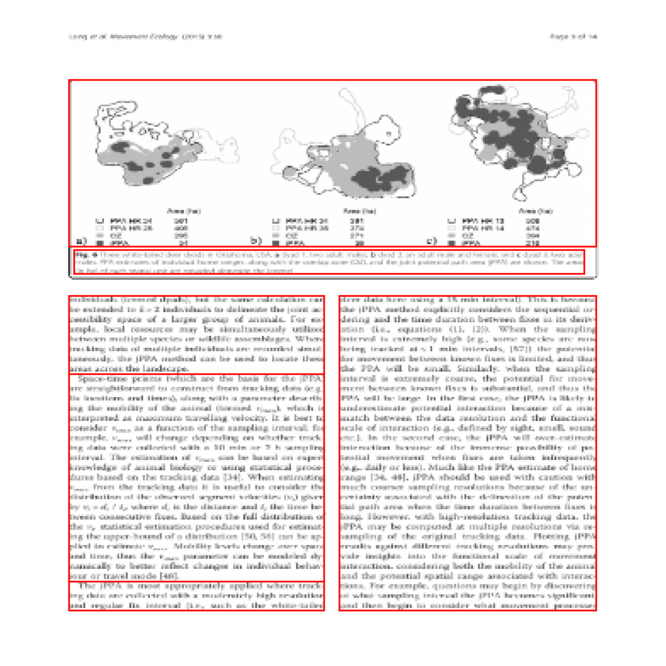

In [155]:
visualize(images[0], targets[0]['boxes'])

# Model

In [156]:
print(f'number of configs: {len(efficientdet_model_param_dict)}')
list(efficientdet_model_param_dict.keys())

number of configs: 48


['efficientdet_d0',
 'efficientdet_d1',
 'efficientdet_d2',
 'efficientdet_d3',
 'efficientdet_d4',
 'efficientdet_d5',
 'efficientdetv2_dt',
 'efficientdetv2_ds',
 'resdet50',
 'cspresdet50',
 'cspresdext50',
 'cspresdext50pan',
 'cspdarkdet53',
 'cspdarkdet53m',
 'mixdet_m',
 'mixdet_l',
 'mobiledetv2_110d',
 'mobiledetv2_120d',
 'mobiledetv3_large',
 'efficientdet_q0',
 'efficientdet_q1',
 'efficientdet_q2',
 'efficientdet_w0',
 'efficientdet_es',
 'efficientdet_em',
 'efficientdet_lite0',
 'tf_efficientdet_d0',
 'tf_efficientdet_d1',
 'tf_efficientdet_d2',
 'tf_efficientdet_d3',
 'tf_efficientdet_d4',
 'tf_efficientdet_d5',
 'tf_efficientdet_d6',
 'tf_efficientdet_d7',
 'tf_efficientdet_d7x',
 'tf_efficientdet_d0_ap',
 'tf_efficientdet_d1_ap',
 'tf_efficientdet_d2_ap',
 'tf_efficientdet_d3_ap',
 'tf_efficientdet_d4_ap',
 'tf_efficientdet_d5_ap',
 'tf_efficientdet_lite0',
 'tf_efficientdet_lite1',
 'tf_efficientdet_lite2',
 'tf_efficientdet_lite3',
 'tf_efficientdet_lite3x',
 'tf_ef

In [157]:
timm.list_models('efficientnetv2_*')

['efficientnetv2_l',
 'efficientnetv2_m',
 'efficientnetv2_rw_m',
 'efficientnetv2_rw_s',
 'efficientnetv2_rw_t',
 'efficientnetv2_s',
 'efficientnetv2_xl']

In [158]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

# For experiments three models were choosen: 
* mixdet, effdet trained with mixed training techique (https://arxiv.org/pdf/2111.03056.pdf)
* efficientdetv2_dt (https://arxiv.org/pdf/2104.00298.pdf)
* efficientdetv2_ds (https://arxiv.org/pdf/2104.00298.pdf)

These model were choosen because of their small size (it helps them not to overfit fast for small amount of given data and fit in my kaggle quota :))) )
Moreover first version of these models showed sota result in 2021 for one-stage detectors (https://arxiv.org/pdf/2104.11892.pdf)
  For boxes fusion was choosen following method (https://github.com/ZFTurbo/Weighted-Boxes-Fusion) as it shows amazing results and gives boost compared to NMS and its variants


Following the recipe (http://karpathy.github.io/2019/04/25/recipe/) of THE great and mighty Andrej Karpathy small model was chosen and *no* augmentations were used to keep things pretty simple. Model was trained for 90 epochs

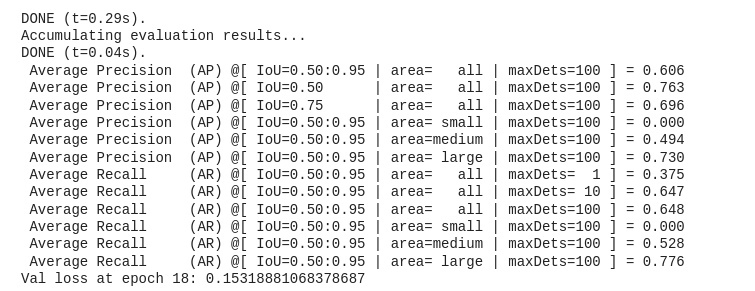

In [159]:
from effdet.config.model_config import efficientdet_model_param_dict
from effdet import get_efficientdet_config, EfficientDet, DetBenchTrain
from effdet.efficientdet import HeadNet
from effdet.config.model_config import efficientdet_model_param_dict

def create_model(num_classes=2, image_size=config['image_size'], architecture="tf_efficientnetv2_s"):
    efficientdet_model_param_dict['efficientnetv2_rw_s'] = dict(
        name='tf_efficientnetv2_b0',
        backbone_name='tf_efficientnetv2_b0',
        backbone_args=dict(drop_path_rate=0.2),
        num_classes=num_classes,
        url='', )
    
    config = get_efficientdet_config(architecture) 
    config.update({'num_classes': num_classes})
    config.update({'image_size': (image_size, image_size)})
    
    print(config)

    net = EfficientDet(config, pretrained_backbone=True)
    net.class_net = HeadNet(
        config,
        num_outputs=config.num_classes,
    )
    return DetBenchTrain(net, config)

In [160]:
model = create_model(2, config['image_size'], architecture='efficientdetv2_dt')

{'name': 'efficientdetv2_dt', 'backbone_name': 'efficientnetv2_rw_t', 'backbone_args': {'drop_path_rate': 0.2}, 'backbone_indices': None, 'image_size': [384, 384], 'num_classes': 2, 'min_level': 3, 'max_level': 7, 'num_levels': 5, 'num_scales': 3, 'aspect_ratios': [1.0, 2.0, 0.5], 'anchor_scale': 4.0, 'pad_type': '', 'act_type': 'swish', 'norm_layer': None, 'norm_kwargs': {'eps': 0.001, 'momentum': 0.01}, 'box_class_repeats': 3, 'fpn_cell_repeats': 5, 'fpn_channels': 128, 'separable_conv': True, 'apply_resample_bn': True, 'conv_bn_relu_pattern': False, 'downsample_type': 'bilinear', 'upsample_type': 'bilinear', 'redundant_bias': False, 'head_bn_level_first': True, 'head_act_type': None, 'fpn_name': None, 'fpn_config': None, 'fpn_drop_path_rate': 0.0, 'alpha': 0.25, 'gamma': 1.5, 'label_smoothing': 0.0, 'legacy_focal': False, 'jit_loss': False, 'delta': 0.1, 'box_loss_weight': 50.0, 'soft_nms': False, 'max_detection_points': 5000, 'max_det_per_image': 100, 'url': 'https://github.com/rwi

After successful training of tiny model, the next small model, were chosen to be trained. Still without any augmentations. This model was trained for 160 epochs

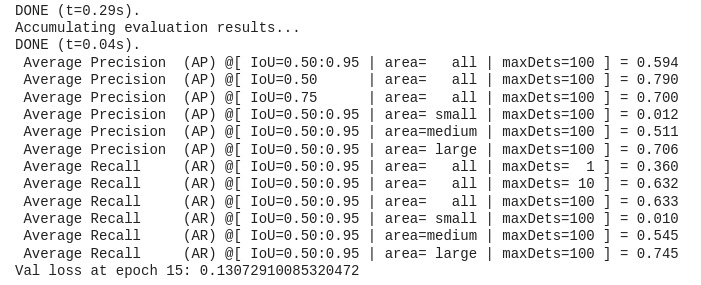

In [161]:
model = create_model(2, config['image_size'], architecture='efficientdetv2_ds')

{'name': 'efficientdetv2_ds', 'backbone_name': 'efficientnetv2_rw_s', 'backbone_args': {'drop_path_rate': 0.2}, 'backbone_indices': None, 'image_size': [384, 384], 'num_classes': 2, 'min_level': 3, 'max_level': 7, 'num_levels': 5, 'num_scales': 3, 'aspect_ratios': [1.0, 2.0, 0.5], 'anchor_scale': 4.0, 'pad_type': '', 'act_type': 'swish', 'norm_layer': None, 'norm_kwargs': {'eps': 0.001, 'momentum': 0.01}, 'box_class_repeats': 4, 'fpn_cell_repeats': 7, 'fpn_channels': 256, 'separable_conv': True, 'apply_resample_bn': True, 'conv_bn_relu_pattern': False, 'downsample_type': 'bilinear', 'upsample_type': 'bilinear', 'redundant_bias': False, 'head_bn_level_first': True, 'head_act_type': None, 'fpn_name': None, 'fpn_config': None, 'fpn_drop_path_rate': 0.0, 'alpha': 0.25, 'gamma': 1.5, 'label_smoothing': 0.0, 'legacy_focal': False, 'jit_loss': False, 'delta': 0.1, 'box_loss_weight': 50.0, 'soft_nms': False, 'max_detection_points': 5000, 'max_det_per_image': 100, 'url': 'https://github.com/rwi

In [162]:
count_parameters(model)

26377091

The next model is the mixdet. Though this model 8 times smaller than previous model in terms of parameters, hopefully adding augmentations can help in learning useful representations and surpass previous model or at least have comparable performace.   
  Classic augmentations, i.e. horizontal and vertical flips were choosed for the first attempt, which led models to problems with converging. Geometric transforms are the challenging one for layout detection problem and pretty useless for a given data (I should've experiment myself anyway :) ))  
  Following the ideas of https://arxiv.org/pdf/2111.03056.pdf and results from https://www.kaggle.com/c/global-wheat-detection I decided to use Grid Dropout and Random croping.
  As can be seen by results, this tiny model with augmentations in training stage can perform comparable to the model 8 times bigger without augmentations. 
  Depite the fact that converging of this model took 920 epochs, quality of resulting model is on high.
  

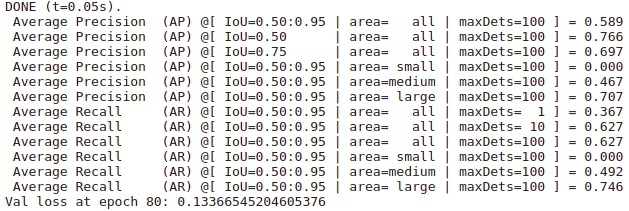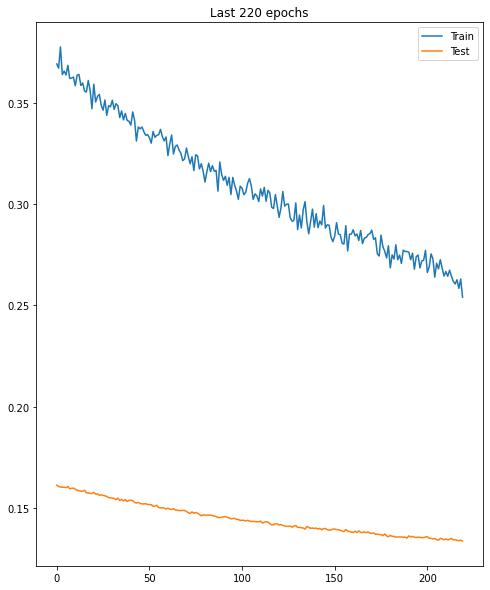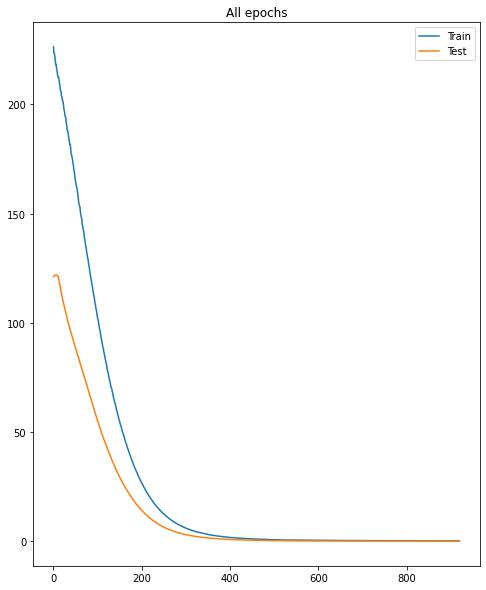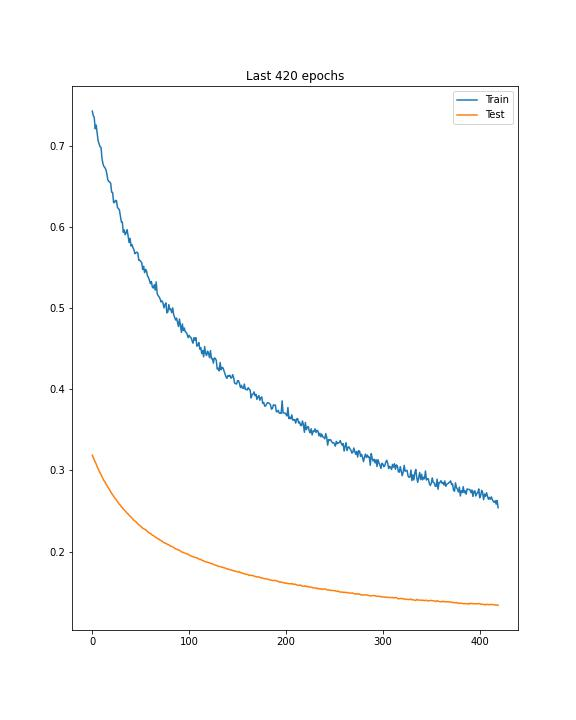

In [163]:
model = create_model(2, config['image_size'], architecture='mixdet_m')

{'name': 'mixdet_m', 'backbone_name': 'mixnet_m', 'backbone_args': {'drop_path_rate': 0.1}, 'backbone_indices': None, 'image_size': [384, 384], 'num_classes': 2, 'min_level': 3, 'max_level': 7, 'num_levels': 5, 'num_scales': 3, 'aspect_ratios': [1.0, 2.0, 0.5], 'anchor_scale': 4.0, 'pad_type': '', 'act_type': 'swish', 'norm_layer': None, 'norm_kwargs': {'eps': 0.001, 'momentum': 0.01}, 'box_class_repeats': 3, 'fpn_cell_repeats': 3, 'fpn_channels': 64, 'separable_conv': True, 'apply_resample_bn': True, 'conv_bn_relu_pattern': False, 'downsample_type': 'max', 'upsample_type': 'nearest', 'redundant_bias': False, 'head_bn_level_first': True, 'head_act_type': None, 'fpn_name': None, 'fpn_config': None, 'fpn_drop_path_rate': 0.0, 'alpha': 0.25, 'gamma': 1.5, 'label_smoothing': 0.0, 'legacy_focal': False, 'jit_loss': False, 'delta': 0.1, 'box_loss_weight': 50.0, 'soft_nms': False, 'max_detection_points': 5000, 'max_det_per_image': 100, 'url': ''}


In [164]:
count_parameters(model)

3375989

In [165]:
model.to(device)
params = [p for p in model.parameters() if p.requires_grad]
optimizer = torch.optim.AdamW(params, lr=config['learning_rate'], weight_decay=config['weight_decay'])

In [166]:
def train(train_data_loader, model, optimizer):
    model.train()
    print('Training')
    summed_losses = []
    
     # initialize tqdm progress bar
    prog_bar = tqdm.tqdm(train_data_loader, total=len(train_data_loader))
    
    for i, data in enumerate(prog_bar):   
        images, targets, _ = data   

        images = images.to(device).float()
        targets = {target: targets[target].to(device) for target in targets.keys()}

        target = {
            "bbox": targets['bbox'],
            "cls": targets['cls']
        }
        loss_dict = model(images, targets)
        losses = sum(loss for loss in loss_dict.values())
        loss_value = losses.item()
        summed_losses.append(loss_value)
        optimizer.zero_grad()
        losses.backward()
        optimizer.step()

        prog_bar.set_description(desc=f"Loss: {loss_value:.4f}")
    return np.mean(summed_losses)

In [167]:
def postprocess_single_prediction_detections(detections):
    boxes = detections.detach().cpu().numpy()[:, :4]
    scores = detections.detach().cpu().numpy()[:, 4]
    classes = detections.detach().cpu().numpy()[:, 5]
    indexes = np.where(scores > config['skip_box_thr'])[0]
    boxes = boxes[indexes]

    return {"boxes": boxes, "scores": scores[indexes], "classes": classes[indexes]}

In [168]:
def run_wbf(predictions,image_size=config['image_size'], iou_thr=config['iou_thr']):
    bboxes = []
    confidences = []
    class_labels = []
    for prediction in predictions:
        boxes = [(prediction["boxes"] / config['image_size']).tolist()]
        scores = [prediction["scores"].tolist()]
        labels = [prediction["classes"].tolist()]

        # print(boxes)

        boxes, scores, labels = ensemble_boxes_wbf.weighted_boxes_fusion(
            boxes,
            scores,
            labels,
            weights=None,
            iou_thr=config['iou_thr'],
            skip_box_thr=config['skip_box_thr'],
        )
        boxes = boxes * (config['image_size'] - 1)
        bboxes.append(boxes.tolist())
        confidences.append(scores.tolist())
        class_labels.append(labels.tolist())

    return bboxes, confidences, class_labels

In [169]:
def post_process_detections(detections):
    predictions = []
    for i in range(detections.shape[0]):
        predictions.append(postprocess_single_prediction_detections(detections[i]))

    predicted_bboxes, predicted_class_confidences, predicted_class_labels = run_wbf(
        predictions, image_size=config['image_size'], iou_thr=0.4
    )

    return predicted_bboxes, predicted_class_confidences, predicted_class_labels

In [170]:
from objdetecteval.metrics.coco_metrics import get_coco_stats

In [171]:
# function for running validation iterations
def validate(valid_data_loader, model):
    model.eval()
    print('Validating')
    summed_losses = []
    
    # initialize tqdm progress bar
    prog_bar = tqdm.tqdm(valid_data_loader, total=len(valid_data_loader))

    post_processed_boxes_agg = []
    post_processed_confidences_agg = []
    post_processed_labels_agg = []
    images_ids_agg = []
    truth_boxes_agg = []
    truth_labels_agg = []

    for i, data in enumerate(prog_bar):
        images, targets, true_targets = data   

        target_dict = {
            "bbox": targets['bbox'],
            "cls": targets['cls']
        }
        images = images.to(device).float()
        targets = {target: targets[target].to(device) for target in targets.keys()}
        
        with torch.no_grad():
            outputs = model(images, targets)
        detections = outputs["detections"]

        batch_predictions = {
            "predictions": detections,
            "targets": targets,
        }


        logging_losses = {
            "class_loss": outputs["class_loss"].detach(),
            "box_loss": outputs["box_loss"].detach(),
        }


        losses = sum(loss for loss in logging_losses.values())
        loss_value = losses.item()
        summed_losses.append(loss_value)
        results = post_process_detections(batch_predictions['predictions'])
        post_processed_boxes = results[0]
        post_processed_confidences = results[1]
        post_processed_labels = results[2]

        truth_boxes = [
        target["boxes"].detach()[:, [1, 0, 3, 2]].tolist() for target in true_targets
        ] # convert to xyxy for evaluation
        truth_labels = [target["labels"].detach().tolist() for target in true_targets]

        post_processed_boxes_agg.extend(post_processed_boxes)
        post_processed_confidences_agg.extend(post_processed_confidences)
        post_processed_labels_agg.extend(post_processed_labels)
        images_ids_agg.extend(targets['image_id'].tolist())
        truth_boxes_agg.extend(truth_boxes)
        truth_labels_agg.extend(truth_labels)
        
        prog_bar.set_description(desc=f"Loss: {loss_value:.4f}")

    stats = get_coco_stats(
      prediction_image_ids=images_ids_agg,
      predicted_class_confidences=post_processed_confidences_agg,
      predicted_bboxes=post_processed_boxes_agg,
      predicted_class_labels=post_processed_labels_agg,
      target_image_ids=images_ids_agg,
      target_bboxes=truth_boxes_agg,
      target_class_labels=truth_labels_agg,
    )['All']

    return np.mean(summed_losses)

In [ ]:
# # model training
# train_losses = []
# val_losses = []
# for epoch in range(config['num_epochs']):
#     train_loss = train(train_dataloader, model, optimizer)
#     train_losses.append(train_loss)
#     print(f'Train loss at epoch {epoch+1}: {train_loss}')
#     val_loss = validate(test_dataloader, model)
#     val_losses.append(val_loss)
#     print(f'Val loss at epoch {epoch+1}: {val_loss}')

In [ ]:
# torch.save({
#     'epoch': epoch+1,
#     'model_state_dict': model.state_dict(),
#     'optimizer_state_dict': optimizer.state_dict(),
#     'train_losses': train_losses,
#     'val_losses': val_losses
#     }, 'best_model.pth')

# Results and inference

In [174]:
def load_model(path_to_weights, model):
    checkpoint = torch.load(path_to_weights, map_location=device)
    model.load_state_dict(checkpoint['model_state_dict'])    

In [175]:
model_tiny = create_model(2, config['image_size'], architecture='efficientdetv2_dt')
model_small = create_model(2, config['image_size'], architecture='efficientdetv2_ds')
model_mixdet = create_model(2, config['image_size'], architecture='mixdet_m')

{'name': 'efficientdetv2_dt', 'backbone_name': 'efficientnetv2_rw_t', 'backbone_args': {'drop_path_rate': 0.2}, 'backbone_indices': None, 'image_size': [384, 384], 'num_classes': 2, 'min_level': 3, 'max_level': 7, 'num_levels': 5, 'num_scales': 3, 'aspect_ratios': [1.0, 2.0, 0.5], 'anchor_scale': 4.0, 'pad_type': '', 'act_type': 'swish', 'norm_layer': None, 'norm_kwargs': {'eps': 0.001, 'momentum': 0.01}, 'box_class_repeats': 3, 'fpn_cell_repeats': 5, 'fpn_channels': 128, 'separable_conv': True, 'apply_resample_bn': True, 'conv_bn_relu_pattern': False, 'downsample_type': 'bilinear', 'upsample_type': 'bilinear', 'redundant_bias': False, 'head_bn_level_first': True, 'head_act_type': None, 'fpn_name': None, 'fpn_config': None, 'fpn_drop_path_rate': 0.0, 'alpha': 0.25, 'gamma': 1.5, 'label_smoothing': 0.0, 'legacy_focal': False, 'jit_loss': False, 'delta': 0.1, 'box_loss_weight': 50.0, 'soft_nms': False, 'max_detection_points': 5000, 'max_det_per_image': 100, 'url': 'https://github.com/rwi

In [177]:
load_model('/content/gdrive/MyDrive/test_task_layout/best_model.pth', model_tiny)
load_model('/content/gdrive/MyDrive/test_task_layout/best_model_big.pth', model_small)
load_model('/content/mixdet_920_epoch.pth', model_mixdet)

In [179]:
model_tiny.to(device).eval();
model_small.to(device).eval();
model_mixdet.to(device).eval();

In [181]:
def __rescale_bboxes(predicted_bboxes, image_sizes):
    scaled_bboxes = []
    for bboxes, img_dims in zip(predicted_bboxes, image_sizes):
        im_h, im_w = img_dims

        if len(bboxes) > 0:
            scaled_bboxes.append(
                (
                    np.array(bboxes)
                    * [
                        im_w / config['image_size'],
                        im_h / config['image_size'],
                        im_w / config['image_size'],
                        im_h / config['image_size'],
                    ]
                ).tolist()
            )
        else:
            scaled_bboxes.append(bboxes)

    return scaled_bboxes


def predict(images_tensor, model):
    """
    For making predictions from tensors returned from the model's dataloader
    Args:
        images_tensor: the images tensor returned from the dataloader

    Returns: a tuple of lists containing bboxes, predicted_class_labels, predicted_class_confidences

    """
    if images_tensor.ndim == 3:
        images_tensor = images_tensor.unsqueeze(0)
    if (
        images_tensor.shape[-1] != config['image_size']
        or images_tensor.shape[-2] != config['image_size']
    ):
        raise ValueError(
            f"Input tensors must be of shape (N, 3, {config['image_size']}, {config['image_size']})"
        )

    num_images = images_tensor.shape[0]
    image_sizes = [(config['image_size'], config['image_size'])] * num_images

    return _run_inference(images_tensor, image_sizes, model)

def _run_inference(images_tensor, image_sizes, model):
    dummy_targets = _create_dummy_inference_targets(
        num_images=images_tensor.shape[0]
    )

    detections = model(images_tensor.to(device), dummy_targets)[
        "detections"
    ]
    (
        predicted_bboxes,
        predicted_class_confidences,
        predicted_class_labels,
    ) = post_process_detections(detections)

    scaled_bboxes = __rescale_bboxes(
        predicted_bboxes=predicted_bboxes, image_sizes=image_sizes
    )

    return scaled_bboxes, predicted_class_labels, predicted_class_confidences

def _create_dummy_inference_targets(num_images):
    dummy_targets = {
        "bbox": [
            torch.tensor([[0.0, 0.0, 0.0, 0.0]], device=device)
            for i in range(num_images)
        ],
        "cls": [torch.tensor([1.0], device=device) for i in range(num_images)],
        "img_size": torch.tensor(
            [(config['image_size'], config['image_size'])] * num_images, device=device
        ).float(),
        "img_scale": torch.ones(num_images, device=device).float(),
    }

    return dummy_targets

In [184]:
test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=config['batch_size'], shuffle=True, #SHUFFLE TRUE TO CHECK PREDICTIONS
                                               num_workers=config['num_workers'], 
                                               collate_fn=collate_fn, 
                                               drop_last=False, pin_memory=config['pin_memory']
                                               )

In [185]:
images, annotations, targets = next(iter(test_dataloader))

In [186]:
boxes_tiny, confidence_tiny, labels_tiny = predict(images, model_tiny)
boxes_small, confidence_small, labels_small = predict(images, model_small)
boxes_mix, confidence_mix, labels_mix = predict(images, model_mixdet)

In [195]:
BOX_COLOR = (255, 0, 0) # Red
TEXT_COLOR = (255, 255, 255) # White

def visualize_bbox(img, bbox, color=BOX_COLOR, thickness=1):
    x_min, y_min, x_max, y_max = bbox
    x_min, y_min, x_max, y_max = int(x_min), int(y_min), int(x_max), int(y_max) 
    cv2.rectangle(img, (x_min, y_min), (x_max, y_max), color=color, thickness=thickness)
    
    return img


def visualize(image, bboxes):
    img = image.permute(1, 2, 0).cpu().numpy().copy()
    for bbox in bboxes:
        img = visualize_bbox(img, bbox)
    plt.figure(figsize=(12, 12))
    plt.axis('off')
    plt.imshow(img)

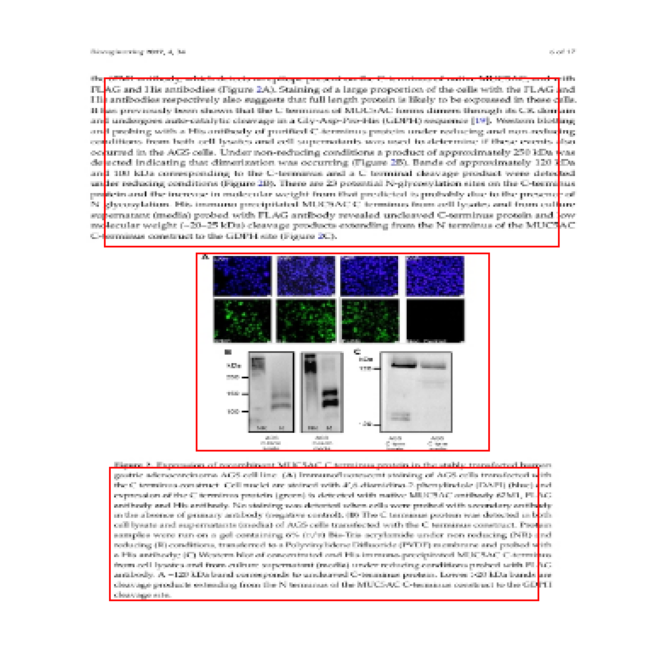

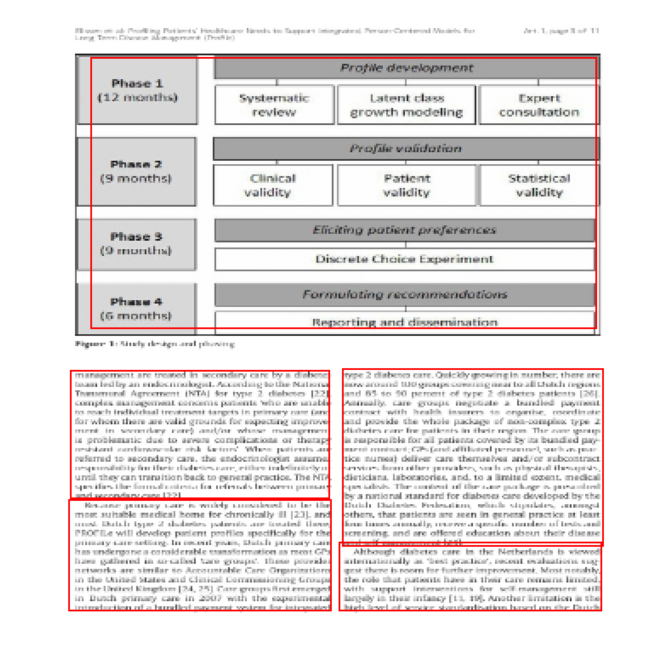

In [196]:
for i in range(config['batch_size']):
  visualize(images[i], boxes_tiny[i])

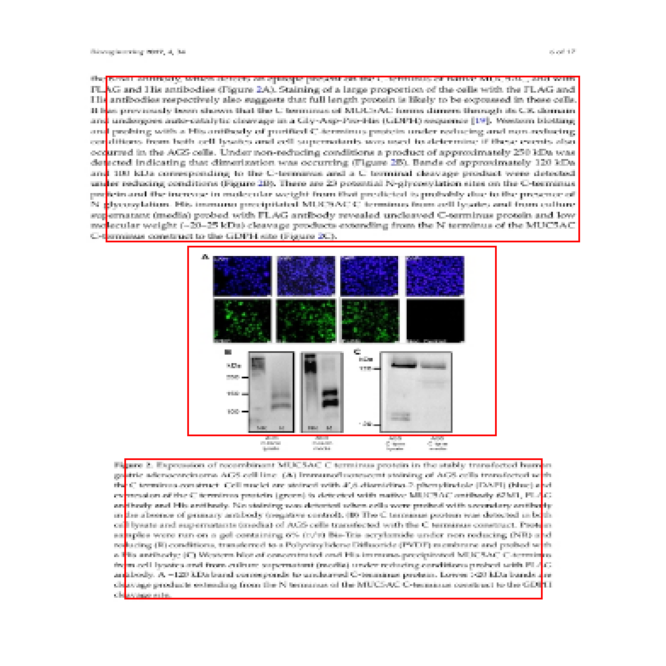

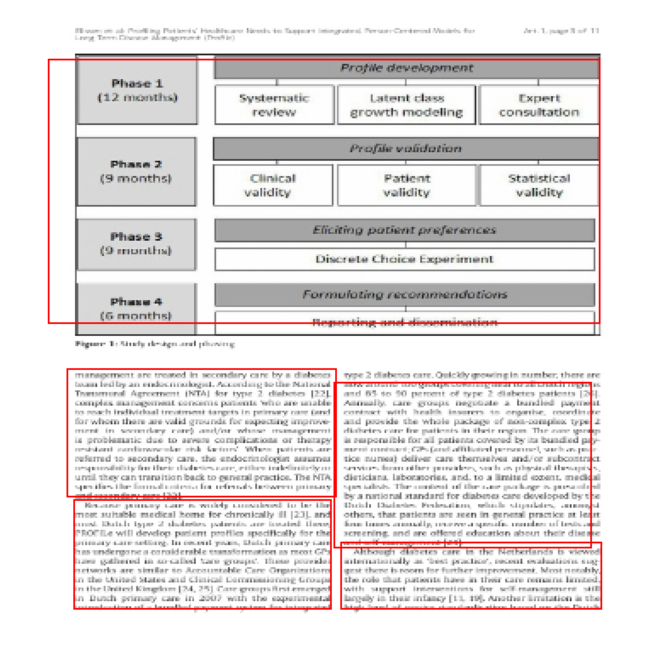

In [197]:
for i in range(config['batch_size']):
  visualize(images[i], boxes_small[i])

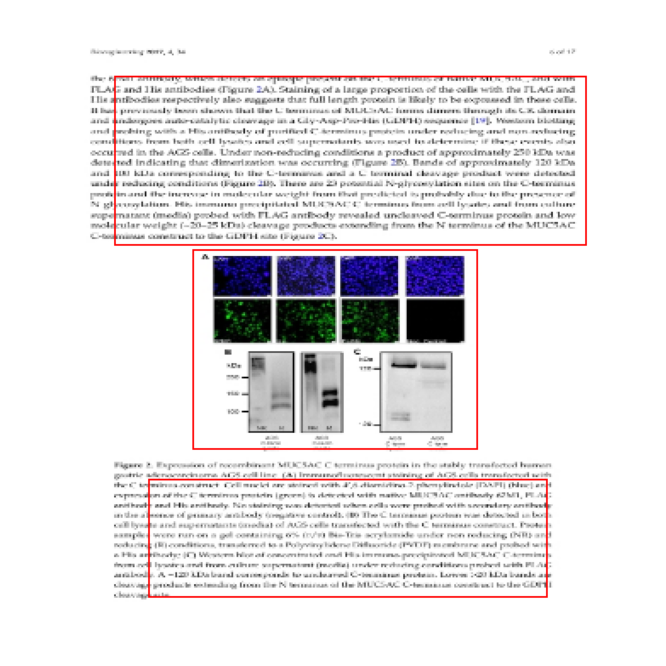

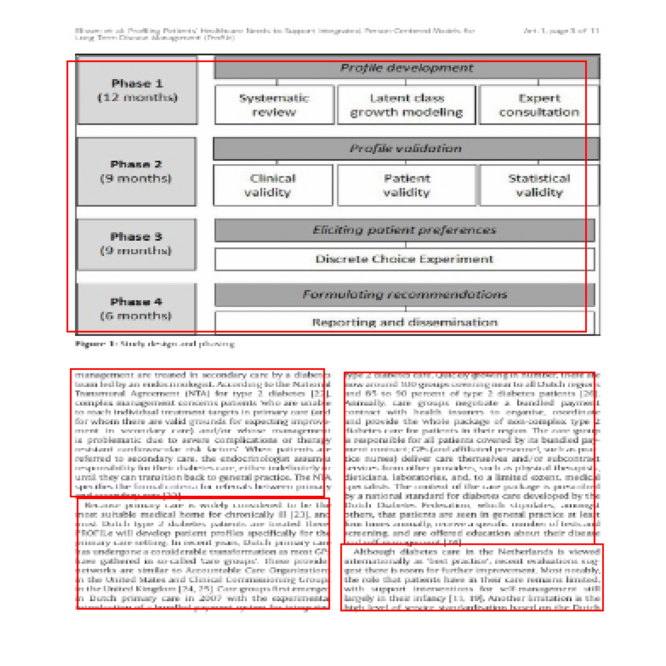

In [198]:
for i in range(config['batch_size']):
  visualize(images[i], boxes_mix[i])

After results analysis, you can tell, that all models struggling with detecting medium objects (usually short paragraphs). To mitigate this problem three models above can be ensembled and assigned with the weights for each model.

# Things I would try if I've had more time for experiments 
* Collect more data
* Cross-validation for each model (in case there is a little data available)
* Ensemble not only effdet models, but also Yolo family, R-CNNs and two-stage detectors, especially SWIN (if inference speed is not critical factor)
* Increase image size 
* Play with aspect ratio of effdet to handle problem with detecting medium-sized objects
* Add scheduling
* Proper logging for experiments (wandb or something like this) 
* Augmentations Specific for layout detection from http://ceur-ws.org/Vol-2831/paper20.pdf